PRACTICAL 1

1. Consider an image that has to be resized. Also perform rgb,bgr,gray scale and HSV conversion on that image.

In [ ]:
from IPython.display import Image

In [4]:
image_path = '/Users/ronaldojerang/Desktop/testimage.jpg'

In [5]:
pip install pillow



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from PIL import Image

In [7]:
original_image = Image.open(image_path)

In [8]:
resized_image = original_image.resize((256, 256))


resized_image.show()

# Save the resized image


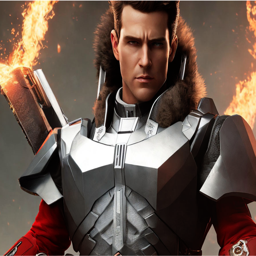

In [9]:
display(resized_image)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

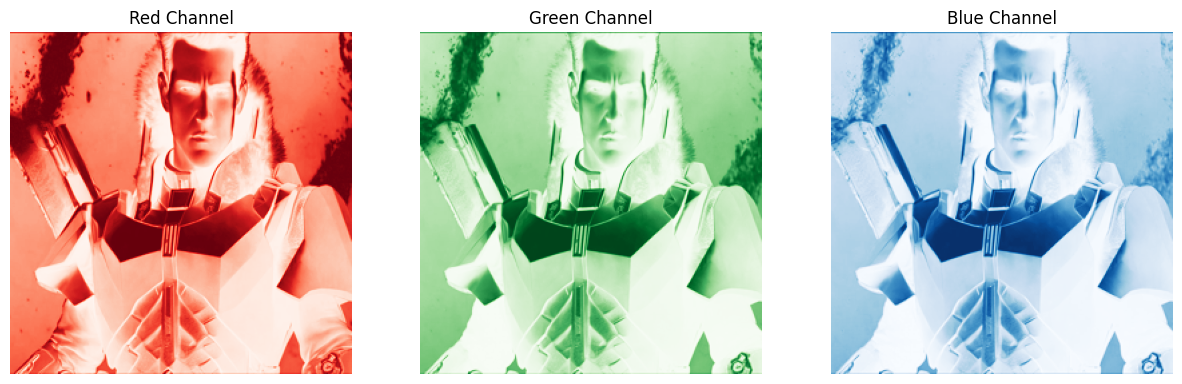

In [11]:




# Convert the image to a numpy array
image_array = np.array(resized_image)

# Split the image into its color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# Display the red, green, and blue channels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[0].axis('off')

axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.show()



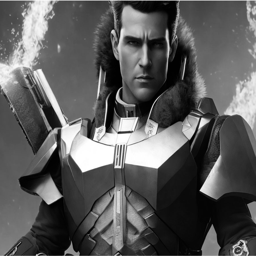

In [12]:

greyscale = resized_image.convert('L')

# Display the HSV image
display(greyscale)


In [13]:
pip install opencv-python



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


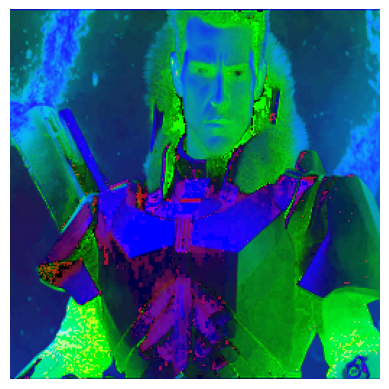

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Convert the Pillow Image to a NumPy array
image_np = np.array(resized_image)

# Convert the image from RGB to HSV using OpenCV
hsv_img = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

# Display the HSV image
plt.imshow(hsv_img)
plt.axis('off')  # Hide axis numbers and ticks
plt.show()






PRACTICAL 2

2. Perform Histogram Stretching on an image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install opencv-python matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


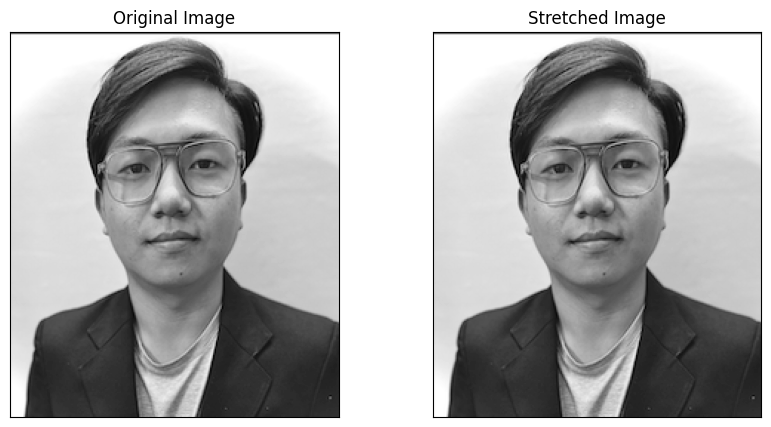

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/ronaldojerang/Desktop/RonaldoJerang.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the minimum and maximum pixel values
min_val = np.min(image)
max_val = np.max(image)

# Perform histogram stretching
stretched_image = ((image - min_val) / (max_val - min_val)) * 255

# Convert to uint8 (0-255 range)
stretched_image = stretched_image.astype(np.uint8)

# Display the original and stretched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image'), plt.xticks([]), plt.yticks([])
plt.show()


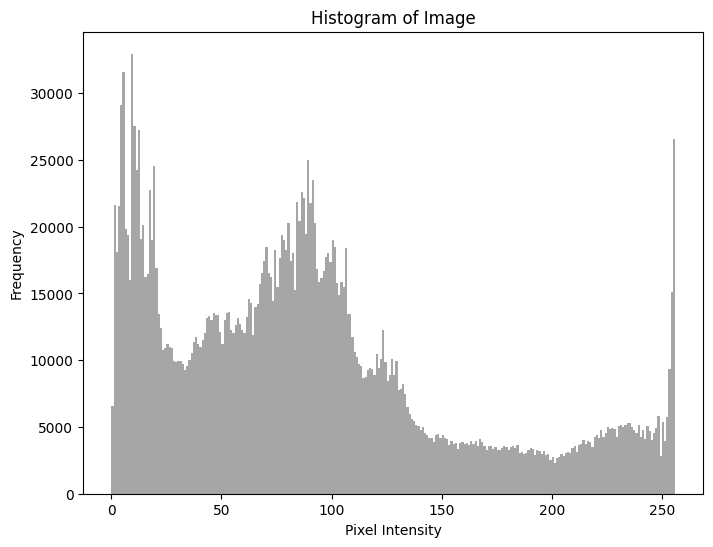

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/Users/ronaldojerang/Desktop/testimage.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(image.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()


In [9]:
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])


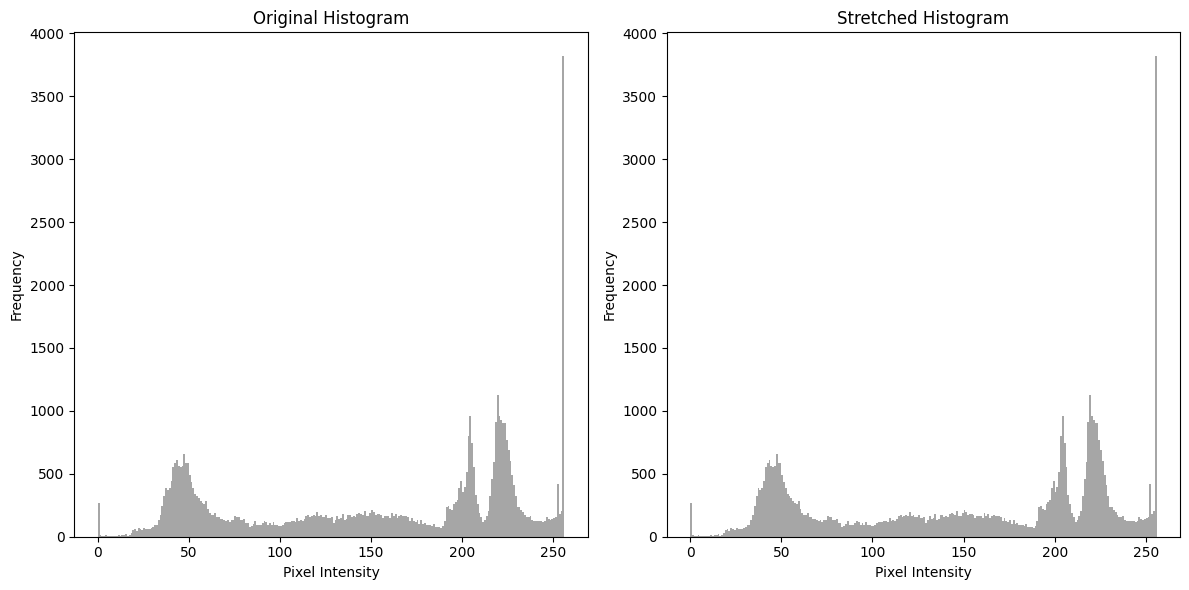

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/Users/ronaldojerang/Desktop/RonaldoJerang.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram stretching
min_val = np.min(image)
max_val = np.max(image)
stretched_image = ((image - min_val) / (max_val - min_val)) * 255

# Convert to uint8
stretched_image = stretched_image.astype(np.uint8)

# Calculate the histogram of the stretched image
hist, bins = np.histogram(stretched_image.flatten(), bins=256, range=[0, 256])

# Plot the original and stretched histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(image.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Original Histogram')

plt.subplot(1, 2, 2)
plt.hist(stretched_image.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Stretched Histogram')

plt.tight_layout()
plt.show()


In [ ]:
# import cv2, numpy, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

	
# function to obtain histogram of an image
def hist_plot(img):
	
	# empty list to store the count
	# of each intensity value
	count =[]
	
	# empty list to store intensity
	# value
	r = []
	
	# loop to traverse each intensity
	# value
	for k in range(0, 256):
		r.append(k)
		count1 = 0
		
		# loops to traverse each pixel in
		# the image
		for i in range(m):
			for j in range(n):
				if img[i, j]== k:
					count1+= 1
		count.append(count1)
		
	return (r, count)


img = cv2.imread('/Users/ronaldojerang/Desktop/rrr.jpg', 0)

# To ascertain total numbers of rows and
# columns of the image, size of the image
m, n = img.shape
r1, count1 = hist_plot(img)

# plotting the histogram
plt.stem(r1, count1)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

# Transformation to obtain stretching
constant = (255-0)/(img.max()-img.min())
img_stretch = img * constant
r, count = hist_plot(img_stretch)

# plotting the histogram
plt.stem(r, count)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the stretched image')

# Storing stretched Image
cv2.imwrite('Stretched Image 4.png', img_stretch)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


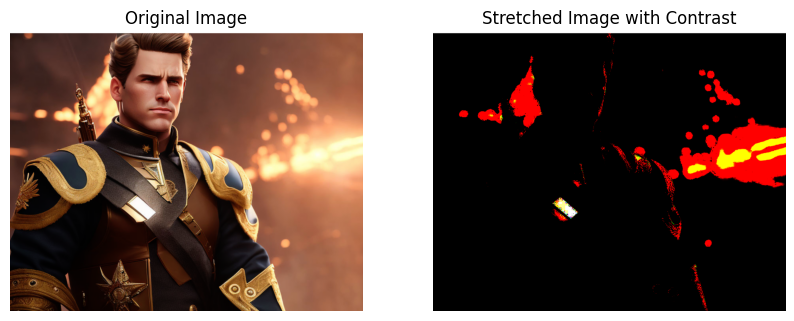

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace this with loading your image)
image = plt.imread('/Users/ronaldojerang/Desktop/rrr.jpg')

# Get the minimum and maximum pixel values
min_val = np.min(image)
max_val = np.max(image)

# Define a contrast factor (adjust as needed)
contrast_factor = 255

# Stretch the histogram with contrast enhancement
stretched_image = ((image - min_val) / (max_val - min_val)) ** contrast_factor * 255

# Display the original and stretched images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image with Contrast')
plt.axis('off')

plt.show()


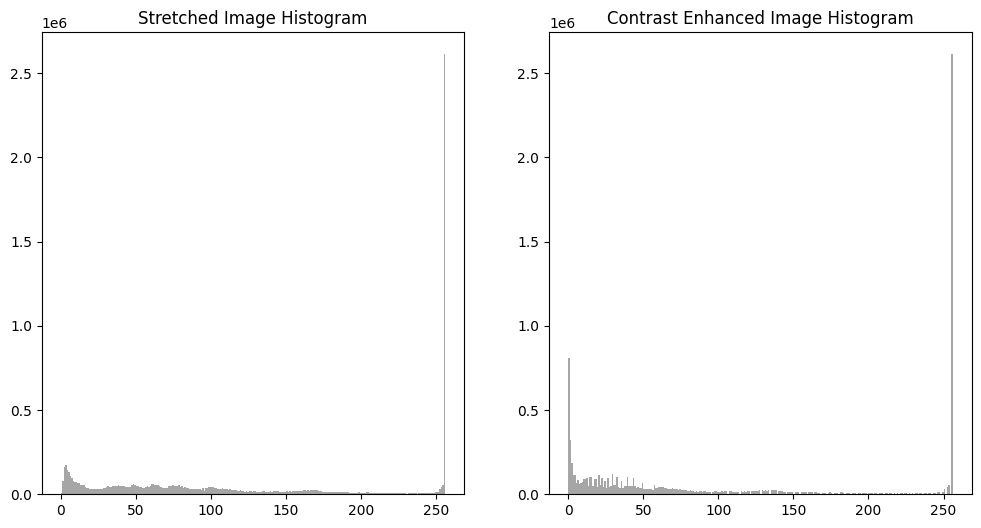

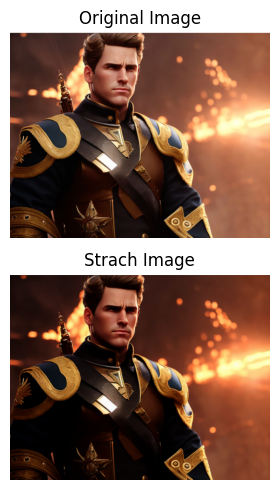

In [14]:
import numpy as np
import matplotlib.pyplot as plt


image = plt.imread('/Users/ronaldojerang/Desktop/rrr.jpg')


f_min = np.min(image)
f_max = np.max(image)

# Define bits per pixel 
bpp = 8


stretched_image = ((image - f_min) / (f_max - f_min)) * (2 ** bpp - 1)

# Clip the values to [0, 255] range
stretched_image = np.clip(stretched_image, 0, 255)


gamma = 1.5  
stretched_image_contrast = np.power(stretched_image / 255.0, gamma) * 255


stretched_image_contrast = stretched_image_contrast.astype(np.uint8)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hist_stretched, bins_stretched, _ = plt.hist(stretched_image.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Stretched Image Histogram')

plt.subplot(1, 2, 2)
hist_contrast, bins_contrast, _ = plt.hist(stretched_image_contrast.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Contrast Enhanced Image Histogram')

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(stretched_image_contrast, cmap='gray')
plt.title('Strach Image')
plt.axis('off')


plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


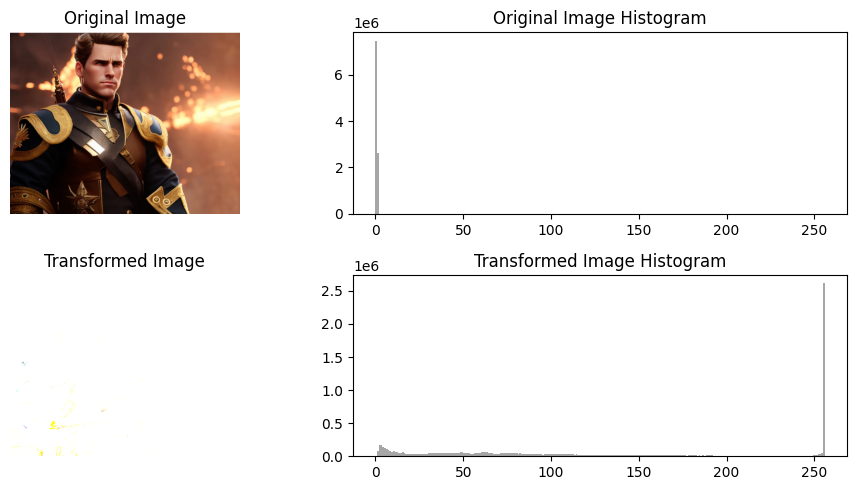

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace this with loading your image)
image = plt.imread('/Users/ronaldojerang/Desktop/rrr.jpg')


f_min = np.min(image)
f_max = np.max(image)


bpp = 8


g = (image - f_min) * (2 ** bpp) / (f_max - f_min)


g = np.clip(g, 0, 255)


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
hist, bins, _ = plt.hist(image.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Original Image Histogram')


plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
hist_stretched, bins_stretched, _ = plt.hist(g.flatten(), 256, [0, 256], color='gray', alpha=0.7)
plt.title('Transformed Image Histogram')

plt.tight_layout()
plt.show()


PRACTICAL 3

Perform Histogram Equalization on an image.

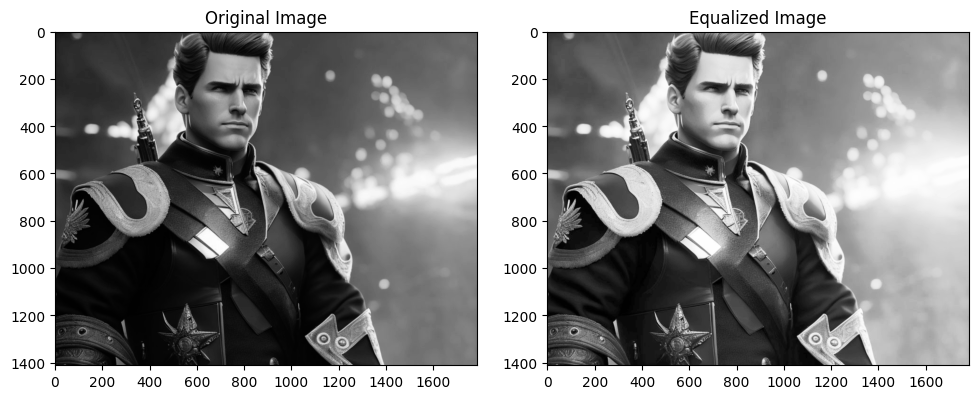

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/ronaldojerang/Desktop/rrr.jpg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display original and equalized images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()


PRACTICAL 4

Image classification using KNN algorithm.

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Prepare the data
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


/Applications/miniconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 97.01%


PRACTICAL 5


Image classification using  kmeans clustering algorithm.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import metrics

# Load the digits dataset (you can replace this with your image dataset)
digits = load_digits()
data = scale(digits.data)

# Using KMeans for clustering
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

# Fit KMeans to the data
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(data)

# Predict the cluster labels
predicted_labels = kmeans.predict(data)

# Evaluate the clustering performance using metrics
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels, predicted_labels)}")
print(f"Mutual Information Score: {metrics.adjusted_mutual_info_score(labels, predicted_labels)}")


Adjusted Rand Index: 0.5706645736812145
Mutual Information Score: 0.696917561414559


PRACTICAL 6 

Image classification using SVM.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset (you can replace this with your image dataset)
digits = datasets.load_digits()

# Split the dataset into features (X) and target labels (y)
X = digits.data
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', gamma='auto')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 98.06%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



PRACTICAL 7

Image classification using naive bayes classifier.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the digits dataset (you can replace this with your image dataset)
digits = datasets.load_digits()

# Split the dataset into features (X) and target labels (y)
X = digits.data
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predict the labels for test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 84.72%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

